<a href="https://colab.research.google.com/github/michele-perrone/SpectrogramPlayer/blob/main/spectrogram_player.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --ignore-installed numba==0.54.0
!pip install --ignore-installed llvmlite==0.37.0
!pip install --ignore-installed Pillow==9.0.0
!pip install nemo-toolkit['all']

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 26.3 MB 1.7 MB/s 
     |████████████████████████████████| 15.3 MB 43.6 MB/s 
     |████████████████████████████████| 1.1 MB 60.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached llvmlite-0.37.0-cp37-cp37m-manylinux2014_x86_64.whl (26.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.54.0 requires numpy<1.21,>=1.17, but you have numpy 1.21.6 which is incompatible.
     |████████████████████████████████| 4.3 MB 5.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 3.2 MB 5.0 MB/s 
     |████████████████████████████████| 12.8 MB 41.5 MB/s 
     |████████████████████████████████| 235 kB 43.3 MB/s 
     |████████████████████████████████| 952 kB 65.9 MB/s 
     |████████████████████████████████| 109 kB 65.4 MB/s 
     |████████████████████████████████| 99 kB 8.0 MB/s 
     |████████████████████████████████| 77 kB 4.6 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 1.7 MB 43.2 MB/s 
     |████████████████████████████████| 74 kB 2.8 MB/s 
     |████████████████████████████████| 147 kB 55.0 MB/s 
     |████████████████████████████████| 1.5 MB 43.3 MB/s 
     |████████████████████████████████| 408 kB 44.8 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |████████████████████████████████| 3.1 MB 39.4 MB/s 
     |████████████████████████████████| 766 kB 47.5 MB/s 
     |████████████████████

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
! chmod 600 kaggle.json

In [4]:
!kaggle datasets download -d rahulbhalley/ljspeech11

100% 2.99G/2.99G [01:32<00:00, 62.5MB/s]
100% 2.99G/2.99G [01:32<00:00, 34.8MB/s]


In [5]:
import matplotlib as plt
import numpy as np 
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import pathlib
import warnings
import random
import os

In [6]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: LJSpeech-1.1/wavs/LJ030-0111.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0112.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0113.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0114.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0115.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0116.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0117.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0118.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0119.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0120.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0121.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0122.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0123.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0124.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0125.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0126.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0127.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0128.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-0129.wav  
  inflating: LJSpeech-1.1/wavs/LJ030-

In [7]:
warnings.filterwarnings("ignore", category=FutureWarning)
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

In [8]:
dataset_path = pathlib.Path('/content/LJSpeech-1.1/wavs')
num_of_test_files = 10 

In [9]:
wavs = []

for index, file in enumerate(dataset_path.iterdir()):
        if index > num_of_test_files:
            break
        file_wav, sr = librosa.load(file)
        wavs.append(file_wav)

# audio sample
ipd.Audio(file_wav, rate = sr)

In [55]:
# compute Linear and Mel-Spectrogram of the clips
spectrograms = list(abs(librosa.stft(file)) for file in wavs)

kwargs = {"n_mels": 80, "fmin": 0}

mel_spectrograms = list(librosa.feature.melspectrogram(file, n_fft=1024, win_length=1024, hop_length=1024//4, **kwargs) for file in wavs)

In [11]:
# testing Griffin Lim
inv_gl = list(librosa.griffinlim(s) for s in spectrograms)
inv_no_phase = list(librosa.istft(s) for s in spectrograms)

Text(0.5, 1.0, 'Magnitude-only istft reconstruction')

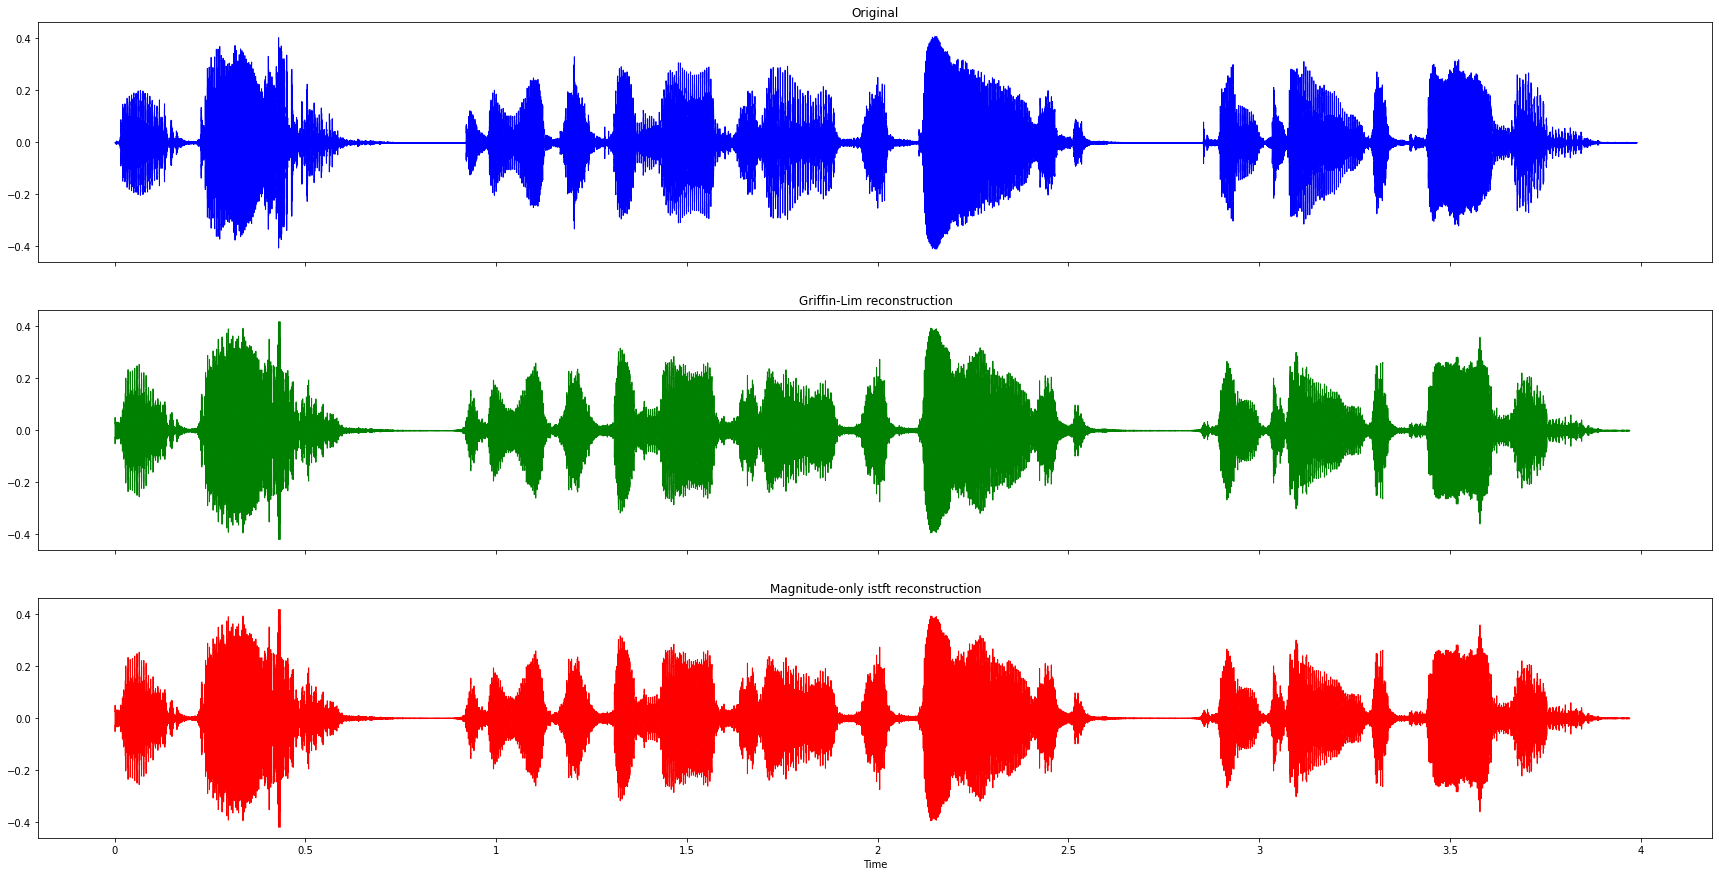

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(30,15))

librosa.display.waveshow(wavs[-1], sr=sr, color='b', ax=ax[0])
ax[0].set(title='Original', xlabel=None)
ax[0].label_outer()
librosa.display.waveshow(inv_gl[-1], sr=sr, color='g', ax=ax[1])
ax[1].set(title='Griffin-Lim reconstruction', xlabel=None)
ax[1].label_outer()
librosa.display.waveshow(inv_gl[-1], sr=sr, color='r', ax=ax[2])
ax[2].set_title('Magnitude-only istft reconstruction')

## Install nVidia NEMO dependencies

In [13]:
import torch
melgan_vocoder = torch.hub.load('descriptinc/melgan-neurips', 'load_melgan')

Downloading: "https://github.com/descriptinc/melgan-neurips/archive/master.zip" to /root/.cache/torch/hub/master.zip


In [21]:
tensor = torch.Tensor(mel_spectrograms[-1])
tensor = tensor[None, :, :]
tensor.shape

torch.Size([1, 80, 172])

In [22]:
# MELGAN

mel = melgan_vocoder(torch.from_numpy(wavs[-1])[None])
print(mel.shape) # TODO check this to properly compute the mel spectrogram
inv_melgan = melgan_vocoder.inverse(mel).squeeze().cpu().numpy()

[NeMo W 2022-05-05 15:01:59 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/torch/functional.py:696: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at  ../aten/src/ATen/native/SpectralOps.cpp:798.)
      normalized, onesided, return_complex)
    


torch.Size([1, 80, 343])


In [15]:
import soundfile as sf
import nemo
from nemo.collections.tts.models.base import Vocoder
import soundfile as sf
from nemo.collections.tts.models import HifiGanModel


In [18]:
# Load HifiGanModel
hifigan_vocoder = Vocoder.from_pretrained(model_name="tts_hifigan").cpu()


[NeMo I 2022-05-05 15:01:29 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.8.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.
[NeMo I 2022-05-05 15:01:29 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.8.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2022-05-05 15:01:29 common:747] Instantiating model from pre-trained checkpoint


[NeMo W 2022-05-05 15:01:34 modelPT:149] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2022-05-05 15:01:34 modelPT:156] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2022-05-05 15:01:34 features:259] PADDING: 0
[NeMo I 2022-05-05 15:01:34 features:276] STFT using torch


[NeMo W 2022-05-05 15:01:34 features:234] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2022-05-05 15:01:34 features:259] PADDING: 0
[NeMo I 2022-05-05 15:01:34 features:276] STFT using torch
[NeMo I 2022-05-05 15:01:36 save_restore_connector:209] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.8.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


In [58]:
# Generate audio
spec = torch.tensor(mel_spectrograms[-1]).unsqueeze(dim=0)
spec.shape
inv_nemo = hifigan_vocoder.convert_spectrogram_to_audio(spec=spec).squeeze().detach().numpy()

In [59]:
ipd.display(ipd.Audio(wavs[-1], rate=sr))
ipd.display(ipd.Audio(inv_gl[-1], rate=sr))
ipd.display(ipd.Audio(inv_no_phase[-1], rate=sr))
ipd.display(ipd.Audio(inv_melgan, rate = sr))
ipd.display(ipd.Audio(inv_nemo, rate = sr))

In [28]:
sr

22050